<a href="https://colab.research.google.com/github/Rushi589/Revenue_Pred_Model/blob/main/Revenue_pred_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**data understanding**

In [ ]:
df=pd.read_csv("/content/Supplement_Sales_Weekly_Expanded.csv")

In [ ]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [ ]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
df.shape

(4384, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    4384 non-null   object 
 1   Category        4384 non-null   object 
 2   Units Sold      4384 non-null   int64  
 3   Price           4384 non-null   float64
 4   Revenue         4384 non-null   float64
 5   Discount        4384 non-null   float64
 6   Units Returned  4384 non-null   int64  
 7   Location        4384 non-null   object 
 8   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 308.4+ KB


In [ ]:
df.isnull().sum()

,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [ ]:
df.corr(numeric_only=True)

,Units Sold,Price,Revenue,Discount,Units Returned
Units Sold,1.000000,0.013749,0.210462,-0.010435,0.116523
Price,0.013749,1.000000,0.977198,-0.008668,-0.010410
Revenue,0.210462,0.977198,1.000000,-0.012531,0.012432
Discount,-0.010435,-0.008668,-0.012531,1.000000,0.004276
Units Returned,0.116523,-0.010410,0.012432,0.004276,1.000000


**EDA**

In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(df[i].value_counts())

Product Name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64
Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64
Location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64
Platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64


In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(i,len(df[i].unique()))

Product Name 16
Category 10
Location 3
Platform 3


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Units Sold 0.0795142964015165


<ipython-input-809-359ad3b6c85a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


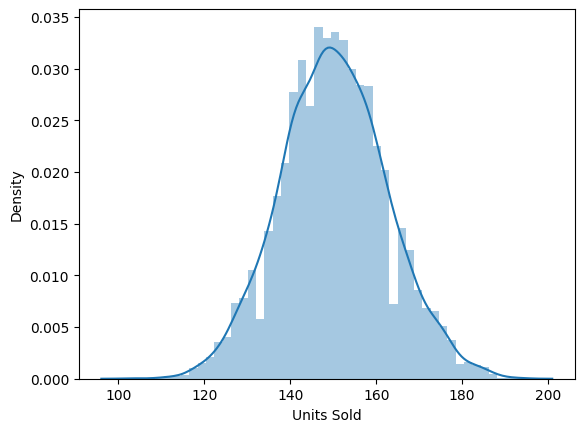

Price 0.012603849371503087


<ipython-input-809-359ad3b6c85a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


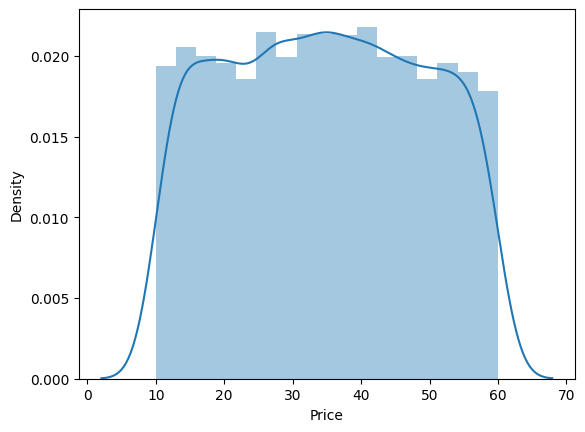

Revenue 0.11858809845262092


<ipython-input-809-359ad3b6c85a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


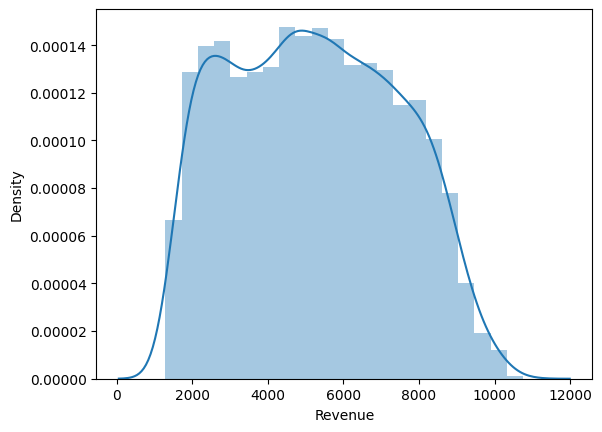

Discount 0.02137671963646177


<ipython-input-809-359ad3b6c85a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


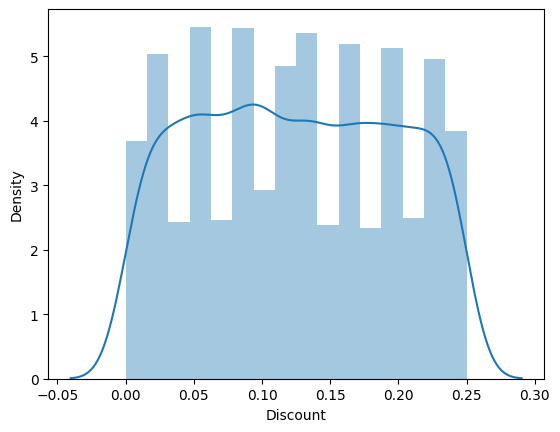

Units Returned 0.8327855048281418


<ipython-input-809-359ad3b6c85a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


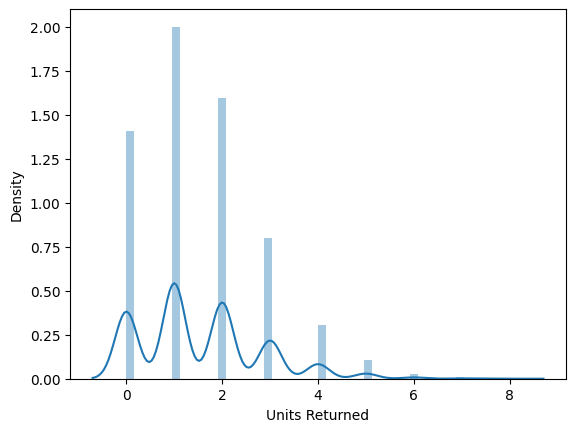

In [ ]:
for i in df.columns[df.dtypes!="object"]:
  print(i,df[i].skew())
  plt.figure()
  sns.distplot(df[i])
  plt.show()

<Axes: xlabel='Category', ylabel='Count'>

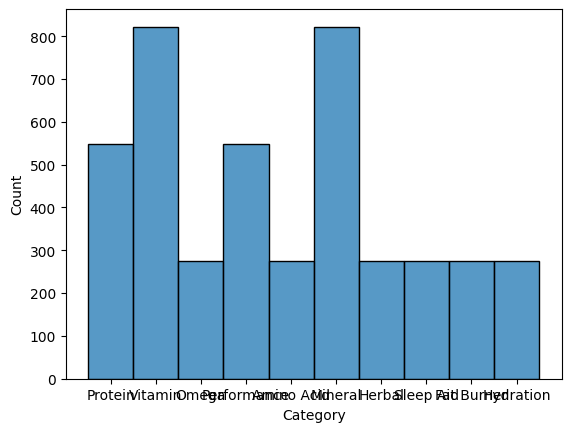

In [ ]:
sns.histplot(df['Category'])

<Axes: ylabel='count'>

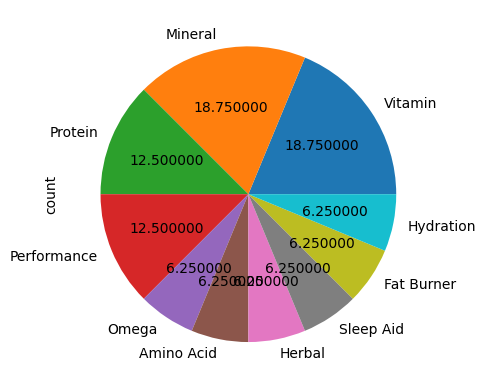

In [ ]:
df['Category'].value_counts().plot(kind='pie',autopct='%2f')

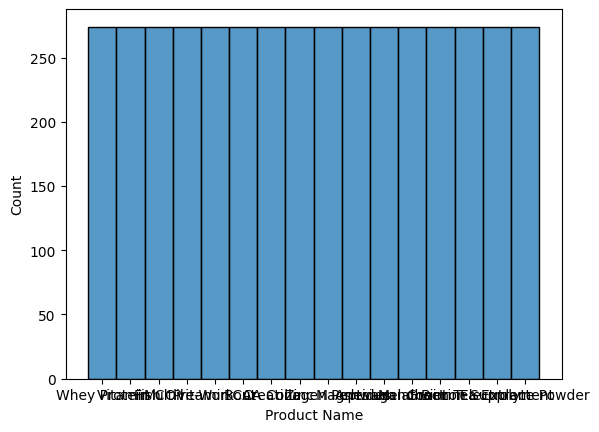

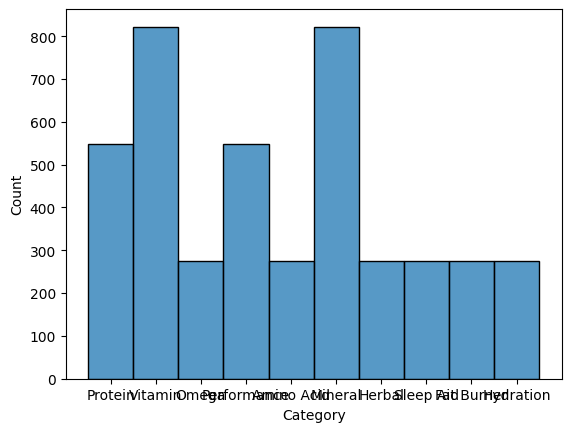

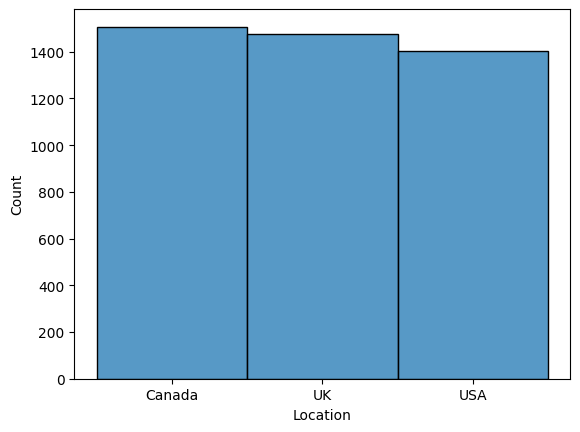

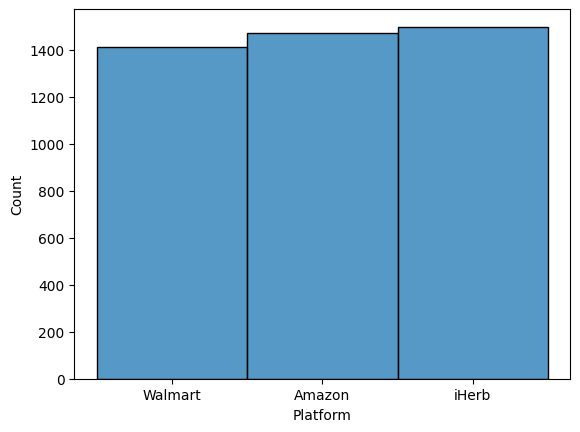

In [ ]:
for i in df.columns[df.dtypes=='object']:
  plt.figure()
  sns.histplot(df[i])
  plt.show()

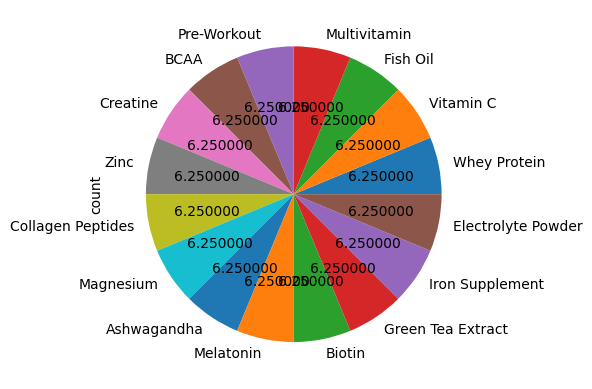

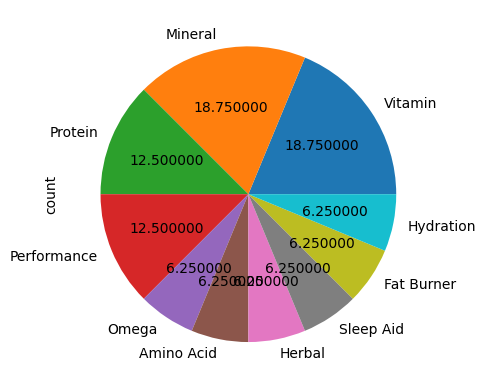

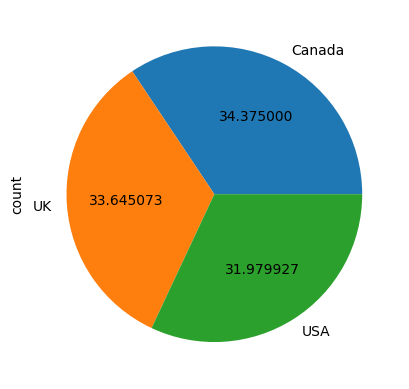

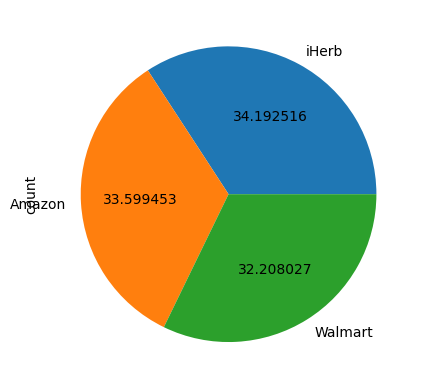

In [ ]:
for i in df.columns[df.dtypes=='object']:
  plt.figure()
  df[i].value_counts().plot(kind='pie',autopct='%2f')
  plt.show()

In [ ]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


<Axes: xlabel='Revenue', ylabel='Units Sold'>

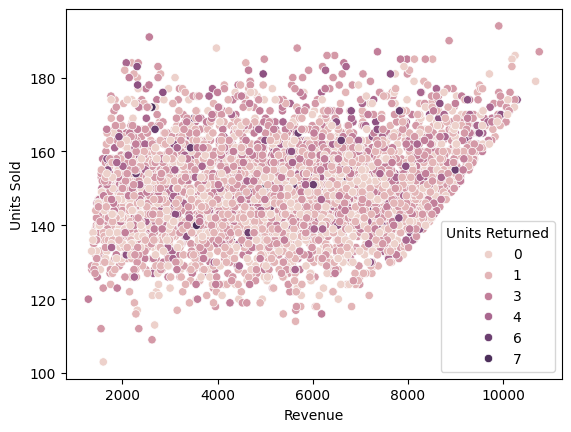

In [ ]:
sns.scatterplot(df,x=df['Revenue'],y=df['Units Sold'],hue=df['Units Returned'])

<Axes: xlabel='Revenue', ylabel='Units Sold'>

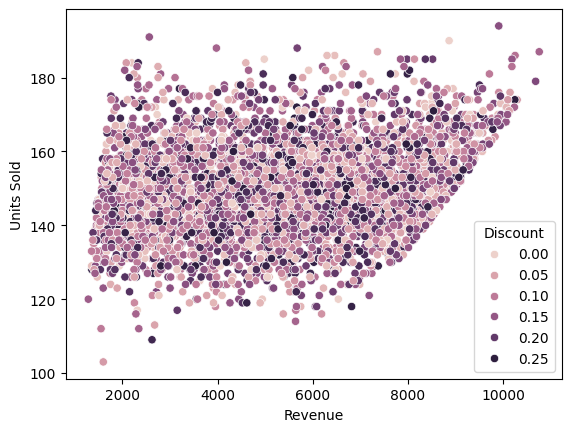

In [ ]:
sns.scatterplot(df,x=df['Revenue'],y=df['Units Sold'],hue=df['Discount'])

In [ ]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [ ]:
cross=['Product Name','Category','Location','Platform']

for i in cross:

 print(pd.crosstab(df[i],df['Units Returned']))

Units Returned       0    1   2   3   4  5  6  7  8
Product Name                                       
Ashwagandha         57   96  86  22   9  3  0  1  0
BCAA                59   90  62  42  17  4  0  0  0
Biotin              56  103  65  30  14  4  2  0  0
Collagen Peptides   60   87  67  41  14  4  0  1  0
Creatine            68   78  76  35  10  4  2  0  1
Electrolyte Powder  54   87  73  40  13  6  1  0  0
Fish Oil            68   89  59  36  18  4  0  0  0
Green Tea Extract   64   80  77  36  10  7  0  0  0
Iron Supplement     52   88  90  25  13  5  1  0  0
Magnesium           66   88  59  37  14  3  6  1  0
Melatonin           65   94  62  36   7  7  2  1  0
Multivitamin        72   73  72  36   9  8  4  0  0
Pre-Workout         53  103  57  40  16  5  0  0  0
Vitamin C           53   83  74  38  19  6  1  0  0
Whey Protein        60   96  65  32  18  3  0  0  0
Zinc                79   68  76  35  13  2  0  1  0
Units Returned    0    1    2    3   4   5  6  7  8
Category    

<Axes: xlabel='Category', ylabel='Count'>

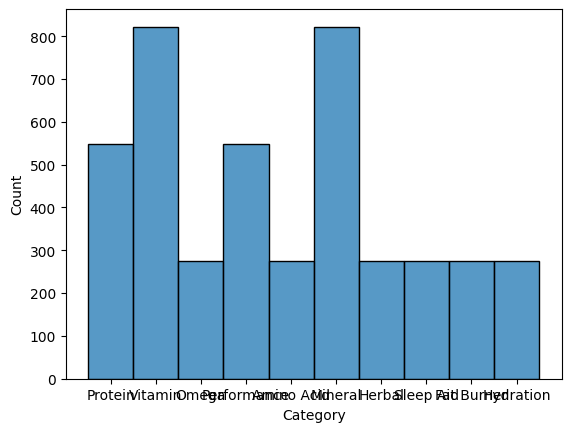

In [ ]:
sns.histplot(df['Category'])

In [ ]:
pd.crosstab(df["Category"],df["Location"])

Location,Canada,UK,USA
Category,,,
Amino Acid,87,105,82
Fat Burner,102,86,86
Herbal,79,95,100
Hydration,93,89,92
Mineral,279,287,256
Omega,103,88,83
Performance,210,174,164
Protein,201,178,169
Sleep Aid,101,81,92


<Axes: xlabel='Location', ylabel='Category'>

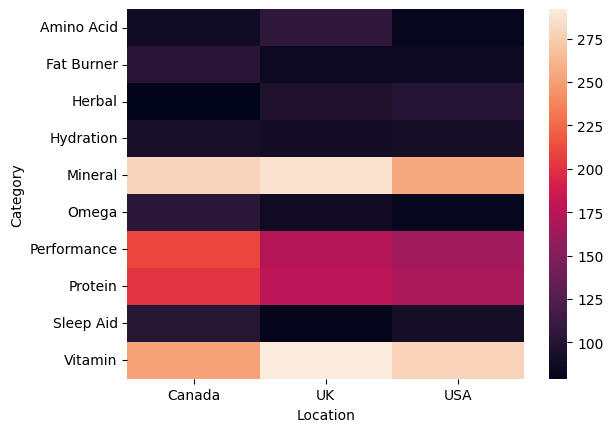

In [ ]:
sns.heatmap(pd.crosstab(df["Category"],df["Location"]))

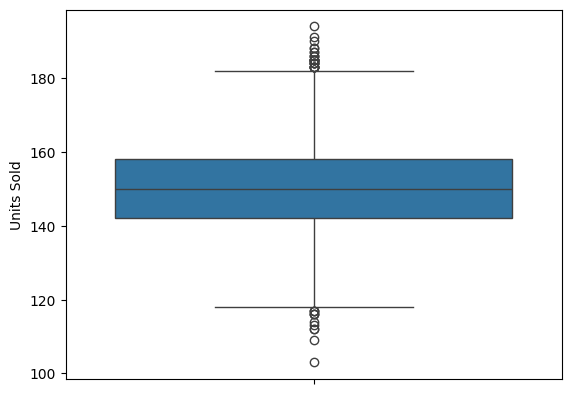

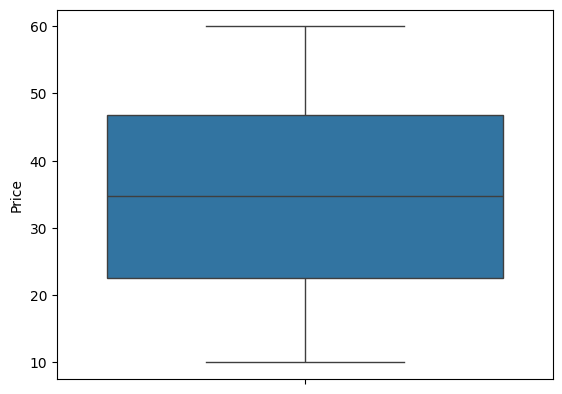

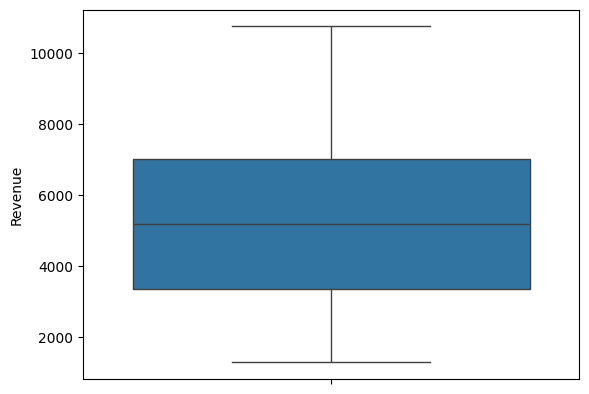

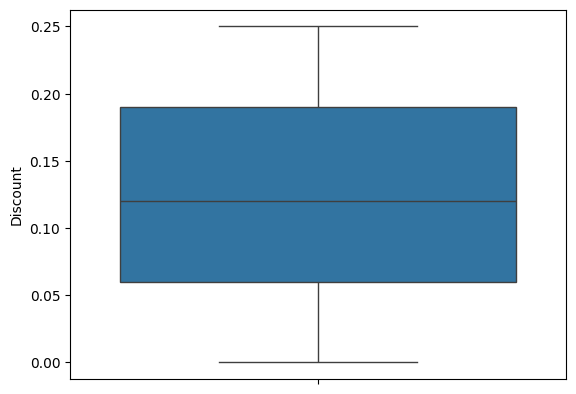

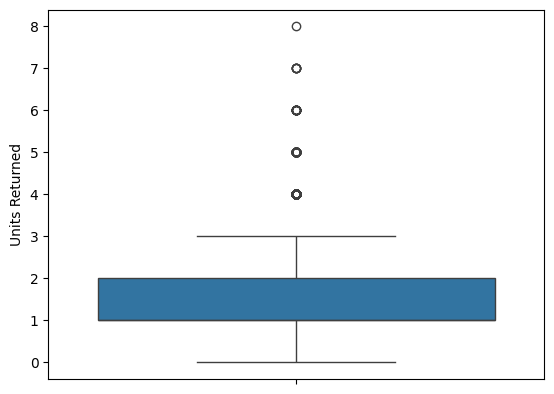

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


**outliers detection**

In [ ]:
outlier_detect=['Units Sold','Units Returned']

In [ ]:
outlier_detect=['Units Sold','Units Returned']

for i in outlier_detect:
  percentile_25=df[i].quantile(0.25)
  percentile_75=df[i].quantile(0.75)
  iqr=percentile_75-percentile_25
  upper_limit=percentile_75+1.5*iqr
  lower_limit=percentile_25-1.5*iqr
  percent_values_25=((df[i]<lower_limit).sum()/df.shape[0])*100
  percent_values_75=((df[i]>upper_limit).sum()/df.shape[0])*100
  print(i,percent_values_25,percent_values_75)

Units Sold 0.2737226277372263 0.6386861313868614
Units Returned 0.0 7.162408759124088


**Outlier Capping**

In [ ]:
for i in outlier_detect:
  percentile_25=df[i].quantile(0.25)
  percentile_75=df[i].quantile(0.75)
  iqr=percentile_75-percentile_25
  upper_limit=percentile_75+1.5*iqr
  lower_limit=percentile_25-1.5*iqr

  df[i]=np.where(df[i]>upper_limit,upper_limit,
                 np.where(df[i]<lower_limit,lower_limit,df[i]))

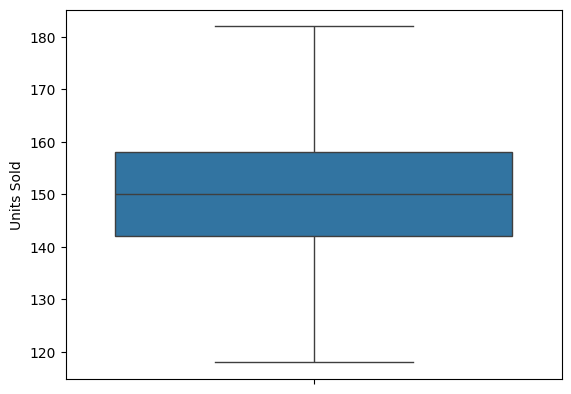

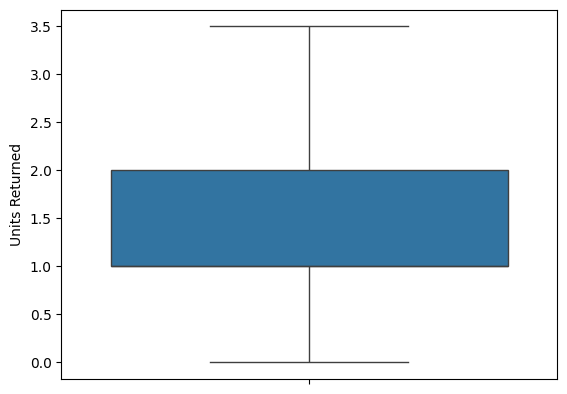

In [ ]:
for i in outlier_detect:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()


In [ ]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Whey Protein,Protein,143.0,31.98,4573.14,0.03,2.0,Canada,Walmart
1,Vitamin C,Vitamin,139.0,42.51,5908.89,0.04,0.0,UK,Amazon
2,Fish Oil,Omega,161.0,12.91,2078.51,0.25,0.0,Canada,Amazon
3,Multivitamin,Vitamin,140.0,16.07,2249.80,0.08,0.0,Canada,Walmart
4,Pre-Workout,Performance,157.0,35.47,5568.79,0.25,3.0,Canada,iHerb


**Train_Test_split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8]]
y=df['Revenue']

In [ ]:
X

,Product Name,Category,Units Sold,Price,Discount,Units Returned,Location,Platform
0,Whey Protein,Protein,143.0,31.98,0.03,2.0,Canada,Walmart
1,Vitamin C,Vitamin,139.0,42.51,0.04,0.0,UK,Amazon
2,Fish Oil,Omega,161.0,12.91,0.25,0.0,Canada,Amazon
3,Multivitamin,Vitamin,140.0,16.07,0.08,0.0,Canada,Walmart
4,Pre-Workout,Performance,157.0,35.47,0.25,3.0,Canada,iHerb
...,...,...,...,...,...,...,...,...
4379,Melatonin,Sleep Aid,160.0,47.79,0.21,1.0,USA,iHerb
4380,Biotin,Vitamin,154.0,38.12,0.22,1.0,UK,Walmart
4381,Green Tea Extract,Fat Burner,139.0,20.40,0.12,3.0,USA,iHerb
4382,Iron Supplement,Mineral,154.0,18.31,0.23,2.0,Canada,Amazon


In [ ]:
print(len(df['Revenue'].unique()))

4326


In [ ]:
y

,Revenue
0,4573.14
1,5908.89
2,2078.51
3,2249.80
4,5568.79
...,...
4379,7646.40
4380,5870.48
4381,2835.60
4382,2819.74


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3507, 8), (877, 8), (3507,), (877,))

In [ ]:
X_train

,Product Name,Category,Units Sold,Price,Discount,Units Returned,Location,Platform
647,Zinc,Mineral,134.0,48.45,0.11,1.0,Canada,Walmart
2194,Fish Oil,Omega,121.0,59.40,0.16,1.0,Canada,Walmart
2244,Pre-Workout,Performance,145.0,20.09,0.02,2.0,Canada,Amazon
4258,Fish Oil,Omega,121.0,22.88,0.01,0.0,Canada,Amazon
1164,Biotin,Vitamin,143.0,17.52,0.13,2.0,UK,iHerb
...,...,...,...,...,...,...,...,...
3444,Pre-Workout,Performance,167.0,42.60,0.11,3.5,USA,Amazon
466,Fish Oil,Omega,130.0,15.27,0.15,1.0,Canada,iHerb
3092,Pre-Workout,Performance,131.0,28.40,0.17,2.0,USA,Walmart
3772,Biotin,Vitamin,147.0,12.94,0.13,0.0,UK,Amazon


In [ ]:
y_train

,Revenue
647,6492.30
2194,7187.40
2244,2913.05
4258,2768.48
1164,2505.36
...,...
3444,7114.20
466,1985.10
3092,3720.40
3772,1902.18


**Encoding**

In [ ]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Whey Protein,Protein,143.0,31.98,4573.14,0.03,2.0,Canada,Walmart
1,Vitamin C,Vitamin,139.0,42.51,5908.89,0.04,0.0,UK,Amazon
2,Fish Oil,Omega,161.0,12.91,2078.51,0.25,0.0,Canada,Amazon
3,Multivitamin,Vitamin,140.0,16.07,2249.80,0.08,0.0,Canada,Walmart
4,Pre-Workout,Performance,157.0,35.47,5568.79,0.25,3.0,Canada,iHerb


In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(i,(len(df[i].unique())))

Product Name 16
Category 10
Location 3
Platform 3


In [ ]:
ohe_to_encode=['Product Name','Category','Location','Platform']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [ ]:
for i in X_train.select_dtypes(include='object'):
  print(f'{i} : {X_train[i].nunique()}')

Product Name : 16
Category : 10
Location : 3
Platform : 3


In [ ]:
ct1 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore'),[0,1,6,7])
     ], remainder='passthrough')

In [ ]:
scaler=StandardScaler()

In [ ]:
ct2 = ColumnTransformer(transformers=[
    ('ss',StandardScaler(),slice(0,31))
])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ct3 =RandomForestRegressor(n_estimators=100,bootstrap=True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#ct3=PolynomialFeatures(degree=4,include_bias=True)

In [ ]:
#ct4=LinearRegression()

In [ ]:
pipeline = Pipeline([
    ('encode', ct1),
    ('scale', ct2),
    ('model', ct3)

])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 6, 7])])),
                ('scale',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  slice(0, 31, None))])),
                ('model', RandomForestRegressor())])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
pred_train=pipeline.predict(X_train)

In [ ]:
mean_squared_error(pred_train,y_train)

396.13175689397247

In [ ]:
r2_score(y_pred,y_test)

0.9993234013268509

In [ ]:
mean_squared_error(y_pred,y_test)

3122.2683516298684

In [ ]:
import pickle as pk

In [ ]:
pk.dump(pipeline,open("pipeline.pkl",'wb'))